# Simple implementation of a perceptron learning algorithm

In [18]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.random.seed(13)

## For now, we will create a linearly seperable data set to play with.

In [66]:
x_1 = [1,1,1,2,2,3,4,4,5,5,5,6,6]
x_2 = [4,5,6,4,5,5,1,2,1,2,3,1,3]
y   = [1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1]
data= {'x_1':x_1, 'x_2':x_2, 'y':y}
df  = pd.DataFrame(data)

In [83]:
_ = plt.plot(df[df.y == 1].x_1, df[df.y == 1].x_2, marker='.', linestyle='none', color='blue', markersize =50)
_ = plt.plot(df[df.y == -1].x_1, df[df.y == -1].x_2, marker='.', linestyle='none', color='red', markersize =50)

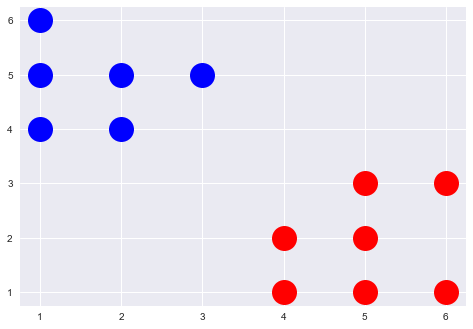

In [84]:
plt.show()

## We have n = 13 linearly separable points of classes -1 and 1

In [165]:
# Initialize vector of weights
n = np.shape(df)[1] #Number of weights is equal to number of variables plus a bias.
                    #  df includes target variable so we subtract 1 from the number of columns in df. Cancels out w/ bias.
weight_initialization_width = .1
W = np.random.uniform(0-weight_initialization_width/2, 0+weight_initialization_width/2, size=n)

In [122]:
# Define activation function
def unit_step_activation(Z):
    if Z >= 0:
        return 1
    else:
        return -1

In [123]:
# Define net imput function
def give_Z(x_1,x_2, W, i): #Only works with 2 variables
    return(1*W[0]+ x_1[i]*W[1]+ x_2[i]*W[2])
   
    

In [126]:
# Define function to give change in weights for sample i
def give_delta_W(y, y_hat, x_1, x_2, i, learning_rate=.01):
    delta_W_0 = learning_rate*(y[i] - y_hat[i])
    delta_W_1 = learning_rate*(y[i] - y_hat[i])*x_1[i]
    delta_W_2 = learning_rate*(y[i] - y_hat[i])*x_2[i]
    return(delta_W_0, delta_W_1, delta_W_2)

In [156]:
# Define function to make predictions
def make_perceptron_pred(x_1, x_2, W):
    Z_values = [give_Z(x_1, x_2, W, i) for i in range(len(x_1))]
    y_hat    = [unit_step_activation(Z) for Z in Z_values]
    return(np.array(y_hat))
        

In [168]:
y_hat = make_perceptron_pred(x_1, x_2, W=[0,0,0])

[ 0  0  0  0  0  0 -2 -2 -2 -2 -2 -2 -2]


In [231]:
# Define function to update weights
def update_weights(W, y, y_hat, x_1, x_2, learning_rate=.01):
    for i in range(len(y)):
        delta_W_0, delta_W_1, delta_W_2 = give_delta_W(y, y_hat, x_1, x_2, i, learning_rate = learning_rate)
        W[0] += delta_W_0
        W[1] += delta_W_1
        W[2] += delta_W_2 
        
              
        
    return(W)


In [340]:
# Function to run algorithm until y_hat doesn't change
def run_perceptron_algorithm_2var(x_1, x_2, y, learning_rate = .01, weight_initialization_width = .5, limit = 1000):
    solved = False
    W = np.random.uniform(0-weight_initialization_width/2, 0+weight_initialization_width/2, size=3)
    count = 0
    y_hat = np.empty_like(y)
    for t in range(limit):
        if count == limit:
            break
        else:
            count += 1
            y_hat_old = y_hat
            y_hat = make_perceptron_pred(x_1, x_2, W)
            update_weights(W, y, y_hat, x_1, x_2, learning_rate=learning_rate)
            if all(y_hat_old == y_hat):
                solved = True
                break
            
        
        
        
        
        
        
        
        
    return({'final weights':W,'predicted values':y_hat, 'number of runs':count, 'success':solved})    

In [354]:
result = run_perceptron_algorithm_2var(x_1, x_2, y, limit=100)
W = result['final weights']

In [355]:
def decision_boundary_equation(x, W):
    p = -(W[1]*x - W[0])/W[2]
    return(p)

In [356]:
plotted_x = list(np.arange(1,max(x_1)+1))
plotted_y = [decision_boundary_equation(x, W) for x in plotted_x]

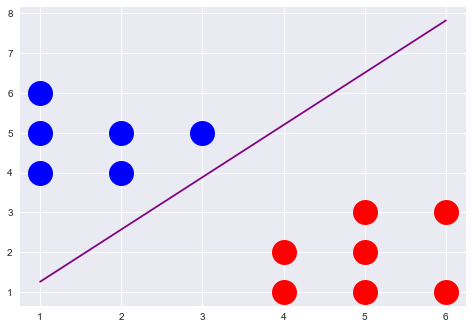

In [357]:
_ = plt.plot(df[df.y == 1].x_1, df[df.y == 1].x_2, marker='.', linestyle='none', color='blue', markersize =50)
_ = plt.plot(df[df.y == -1].x_1, df[df.y == -1].x_2, marker='.', linestyle='none', color='red', markersize =50)
_ = plt.plot(plotted_x, plotted_y, color='purple')
plt.show()